In [52]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot
import scipy.stats as st
import seaborn as sns
%matplotlib inline

In [53]:
df= pd.read_csv('twins.csv', header=0)
df.head()

,Twin 1,Twin 2
0,113,109
1,94,100
2,99,86
3,77,80
4,81,95


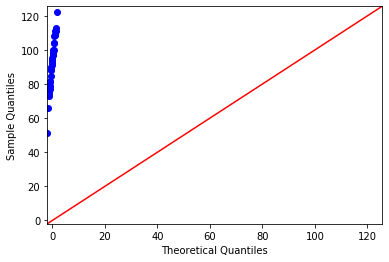

In [54]:
qqplot(df['Twin 1'], line ='45')
plt.show()

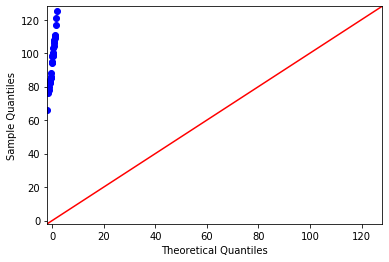

In [55]:
qqplot(df['Twin 2'], line ='45')
plt.show()

#### Both twin 1 and twin 2 don't form a 45 degree line so they are not normally distributed.

#### Null Hypothesis: the mean IQ of twin 1 is statistically the same as twin 2 (𝜇1=𝜇2)
#### Alternative Hypthosis: the mean IQ of twin 1 is statistically different from twin 2 (𝜇1≠𝜇2)
#### We should use a two-tailed test since we are checking for inequality.

In [56]:
def independent_ttest(data1, data2, alpha=0.05):
    """
    Student's t-test for independent groups
    
    Argument:
        data1: First group data in numpy array format
        data2: Second group two data in numpy array format
        alpha: Significance level
    
    Returns:
        t_stat: Computed t-statistic
        df: Degrees of freedom
        cv: Critical value
        p: p-value (of NULL hypothesis)
    """
    import scipy.stats as st
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = st.sem(data1), st.sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = st.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [57]:
n_sample = 32
# calculate the t test
alpha = 0.05
data1=df['Twin 1']
data2=df['Twin 2']
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()

# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-0.800, df=62, cv=1.670, p=0.427

Fail to reject null hypothesis that the means are equal.
Fail to reject null hypothesis that the means are equal.


The t-value is -0.8. The p-value is 0.427. The result is not significant at p < 0.05. The mean IQ of twin 1 is statistically the same as twin 2.

The t-value is -0.8. The p-value is 0.427. The result is not significant at p < 0.01. The mean IQ of twin 1 is statistically the same as twin 2.

Different parenting styles and family environment have not much effect on the expected IQ level.

#### Null Hypothesis: the mean corn yield of regular seed is statistically the same as kiln-dried seed (𝜇1=𝜇2)
#### Alternative Hypthosis: the mean corn yield  of regular seed is statistically different from kiln-dried seed (𝜇1≠𝜇2)

In [58]:
f= pd.read_csv('seeds.csv', header=0)
f.head()

,Regular seed,Kiln-dried seed
0,1903,2009
1,1935,1915
2,1910,2011
3,2496,2463
4,2108,2180


In [59]:
def independent_ttest(data1, data2, alpha=0.05):
    """
    Student's t-test for independent groups
    
    Argument:
        data1: First group data in numpy array format
        data2: Second group two data in numpy array format
        alpha: Significance level
    
    Returns:
        t_stat: Computed t-statistic
        df: Degrees of freedom
        cv: Critical value
        p: p-value (of NULL hypothesis)
    """
    import scipy.stats as st
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = st.sem(data1), st.sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = st.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [60]:
n_sample = 11
# calculate the t test
alpha = 0.05
data1=f['Regular seed']
data2=f['Kiln-dried seed']
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()

# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-0.234, df=20, cv=1.725, p=0.817

Fail to reject null hypothesis that the means are equal.
Fail to reject null hypothesis that the means are equal.


The t-value is -0.234. The p-value is 0.817. The result is not significant at p < 0.05. The mean corn yield of regular seed is statistically the same as kiln-dried seed.